# 基礎課題18.1

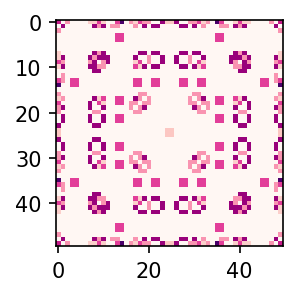

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

# figsizeとnの数値を大きくすればより鮮明なアニメーションになる
fig = plt.figure(figsize = (2, 2), dpi = 150) # 画像の設定
n = 50 # 画像(配列)の大きさ
mod_para = 30 # モデルのパラメータ(配列の要素は0から29)
ims = [] # 描画した画像を一枚一枚保存する入れ物
old_w = np.zeros([n, n]) # n行n列の全の要素が0の行列
# 行番号と列番号の中央の値のみが1の2次元配列
old_w[0, 0] = 1
old_w[0, n-1] = 1
old_w[n-1, 0] = 1
old_w[n-1, n-1] = 1

for t in np.arange(100): # 指定した回数分、遷移の繰り返し
  new_w = np.zeros([n, n]) # 次の状態の入れ物を用意
  for i in np.arange(n): # 行の移動
    for j in np.arange(n): # 列の移動
      # 現在の位置i と j の上下左右の値を加算する
      new_w[i, j] = old_w[i, j] # 中央
      new_w[i, j] += old_w[i - 1, j] # 上の状態
      new_w[i, j] += old_w[(i + 1) % n, j] # 下の状態
      new_w[i, j] += old_w[i, j - 1] # 左の状態
      new_w[i, j] += old_w[i, (j + 1) % n] # 右の状態 
      new_w[i, j] %= mod_para # 剰余を計算
  # 遷移した状態の各要素を使い一枚の画像に変換
  im = plt.imshow(new_w, cmap = 'RdPu', # 色の指定
    interpolation = 'nearest', animated = True) # アニメーションの指定
  ims.append([im]) # imに紐づいている画像一枚を追加して、合計100枚の画像をimsに保存
  old_w = new_w.copy() # 遷移した状態を次のステップで利用するため、遷移により作成した画像(new_w)をold_w にコピーする
# アニメーションの作成 ( ValueError: unknown file extension: .mp4 が発生する場合は補足参照)
ani = ani.ArtistAnimation(fig, # 画像の大きさなどを指定
       ims, # 画像を指定 
       interval = 500, # 画像を切り替えるインターバル 
       blit = True, repeat_delay = 1000)        
# アニメーション (mp4) としてdataフォルダに保存
ani.save('kadai18-1.mp4', writer = 'ffmpeg')
# 以上のプログラムを実行しただけではアニメーションは再生されません。エクスプローラーから  ca.mp4 をクリックして開きましょう。                                                        

中心を1とする初期状態とでは、真ん中の一箇所から模様が変化する
しかし、四隅を1とする初期状態では、四隅の四箇所から模様が変化する。

# 基礎課題18.2

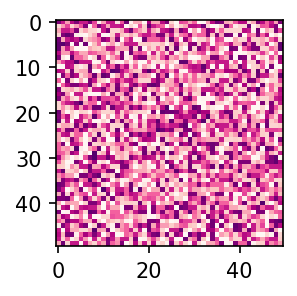

In [2]:
# 0.1 の場合
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

# figsizeとnの数値を大きくすればより鮮明なアニメーションになる
fig = plt.figure(figsize = (2, 2), dpi = 150) # 画像の設定
n = 50 # 画像(配列)の大きさ
mod_para = 30 # モデルのパラメータ(配列の要素は0から29)
ims = [] # 描画した画像を一枚一枚保存する入れ物
old_w = np.zeros([n, n]) # n行n列の全の要素が0の行列
np.random.seed(0) # 数値 0 を変更してみましょう
# 行番号と列番号の中央の値のみが1の2次元配列
old_w = np.random.binomial(1, 0.1, (n, n)) 
#old_w = np.random.binomial(1, 0.5, (n, n)) 
#old_w = np.random.binomial(1, 0.7, (n, n)) 
#old_w = np.random.binomial(1, 0.9, (n, n))

for t in np.arange(3000): # 指定した回数分、遷移の繰り返し
  new_w = np.zeros([n, n]) # 次の状態の入れ物を用意
  for i in np.arange(n): # 行の移動
    for j in np.arange(n): # 列の移動
      # 現在の位置i と j の上下左右の値を加算する
      new_w[i, j] = old_w[i, j] # 中央
      new_w[i, j] += old_w[i - 1, j] # 上の状態
      new_w[i, j] += old_w[(i + 1) % n, j] # 下の状態
      new_w[i, j] += old_w[i, j - 1] # 左の状態
      new_w[i, j] += old_w[i, (j + 1) % n] # 右の状態 
      new_w[i, j] %= mod_para # 剰余を計算
  # 遷移した状態の各要素を使い一枚の画像に変換
  im = plt.imshow(new_w, cmap = 'RdPu', # 色の指定
    interpolation = 'nearest', animated = True) # アニメーションの指定
  ims.append([im]) # imに紐づいている画像一枚を追加して、合計100枚の画像をimsに保存
  old_w = new_w.copy() # 遷移した状態を次のステップで利用するため、遷移により作成した画像(new_w)をold_w にコピーする
# アニメーションの作成 ( ValueError: unknown file extension: .mp4 が発生する場合は補足参照)
ani = ani.ArtistAnimation(fig, # 画像の大きさなどを指定
       ims, # 画像を指定 
       interval = 500, # 画像を切り替えるインターバル 
       blit = True, repeat_delay = 1000)        
# アニメーション (mp4) としてdataフォルダに保存
ani.save('kadai18-2-0_1.mp4', writer = 'ffmpeg')
# 以上のプログラムを実行しただけではアニメーションは再生されません。エクスプローラーから  ca.mp4 をクリックして開きましょう。                                                        

# 基礎課題18.3

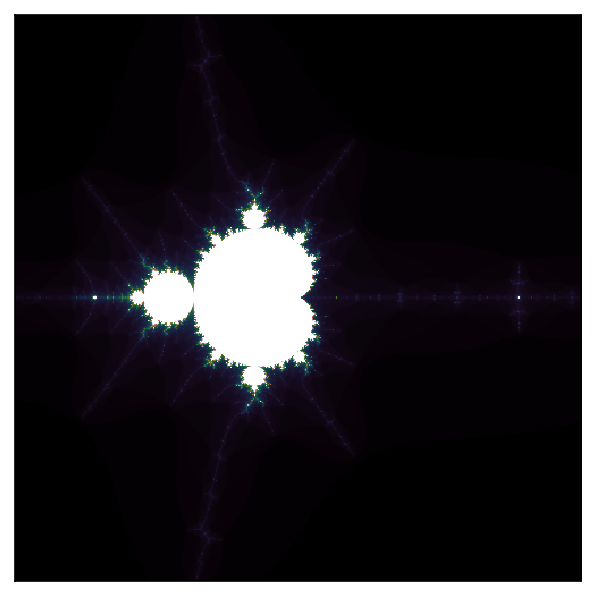

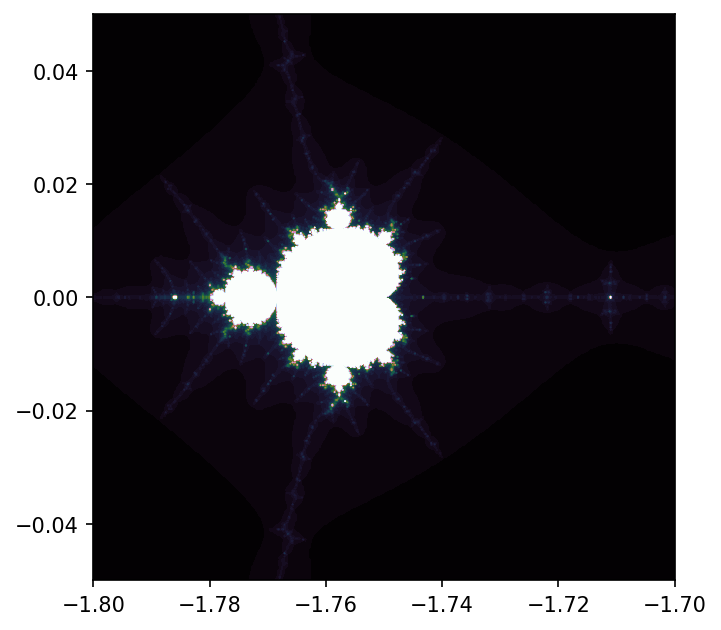

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

fig = plt.figure(figsize = (5, 5), dpi = 150) # 画像の設定
plt.tick_params(length = 0, labelbottom = False, labelleft = False) # 枠を非表示に設定
m = 500 # 画像の細かさ
real = np.linspace(-1.8, -1.7, m)
imag = np.linspace(-0.05, 0.05, m) 
Z = np.zeros([m, m], dtype = 'complex') # 描画元となる値の計算用

for tate, imag_d in enumerate(imag):
    for yoko, real_d in enumerate(real):
        Z[tate, yoko] = real_d + imag_d * 1j # 複素数に変換
c = Z.copy() # 変数 Z に加える値が変わると模様が変化する

imgd = np.zeros([m, m]) # 描画する値を保存する配列
ims = [] # 描画した画像を一枚一枚保存する入れ物
# マンデルブロウ集合を計算し、その計算結果 Z を参考にしながら描画用の配列imgdを作成
for t in np.arange(1, 201): # 200枚分描画するための繰り返し
    for tate in np.arange(m): # 縦軸分繰り返し
        for yoko in np.arange(m):  # 横軸分繰り返し
            if abs(Z[tate, yoko]) <= 2: # 複素数の絶対値が2以内なら
                Z[tate, yoko] = Z[tate, yoko] ** 2 + c[tate, yoko]
                imgd[tate, yoko] = t # 2を超えるタイミングを代入
                # t の値によって色が変化する
    im = plt.imshow(imgd, cmap = 'cubehelix', interpolation = 'nearest', animated = True) # imgd の代わりに abs(Z) も利用可能
    ims.append([im])# アニメーションに画像を追加

ani = ani.ArtistAnimation(fig, ims, interval = 500, blit = True, repeat_delay = 1000)
ani.save('Mandelbrot_set18_3_A.mp4', writer = 'ffmpeg')
fig = plt.figure(figsize = (5, 5), dpi = 150) 
plt.contourf(real, imag, imgd, cmap = 'cubehelix', levels = 50)
plt.savefig('Mandelbrot_set18_3_A.pdf')

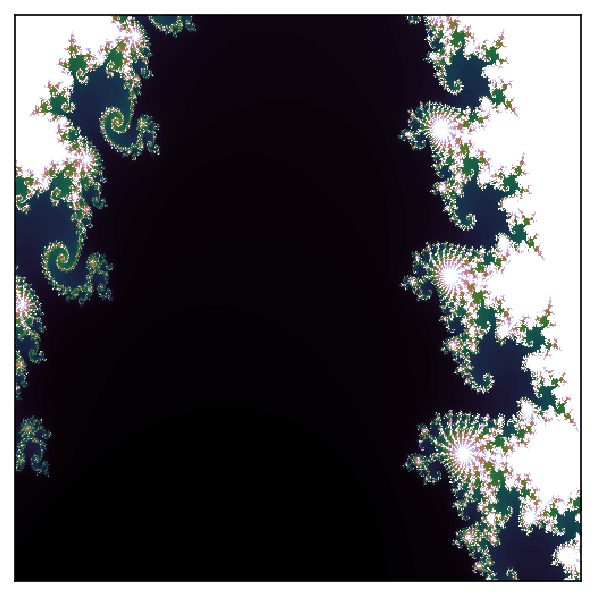

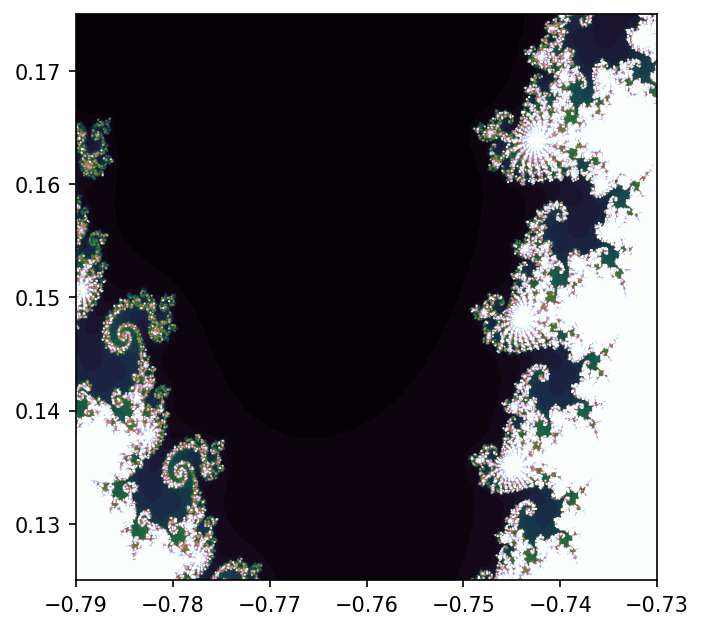

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

fig = plt.figure(figsize = (5, 5), dpi = 150) # 画像の設定
plt.tick_params(length = 0, labelbottom = False, labelleft = False) # 枠を非表示に設定
m = 500 # 画像の細かさ
real = np.linspace(-0.79, -0.73, m) 
imag = np.linspace(0.125, 0.175, m)
Z = np.zeros([m, m], dtype = 'complex') # 描画元となる値の計算用

for tate, imag_d in enumerate(imag):
    for yoko, real_d in enumerate(real):
        Z[tate, yoko] = real_d + imag_d * 1j # 複素数に変換
c = Z.copy() # 変数 Z に加える値が変わると模様が変化する

imgd = np.zeros([m, m]) # 描画する値を保存する配列
ims = [] # 描画した画像を一枚一枚保存する入れ物
# マンデルブロウ集合を計算し、その計算結果 Z を参考にしながら描画用の配列imgdを作成
for t in np.arange(1, 201): # 200枚分描画するための繰り返し
    for tate in np.arange(m): # 縦軸分繰り返し
        for yoko in np.arange(m):  # 横軸分繰り返し
            if abs(Z[tate, yoko]) <= 2: # 複素数の絶対値が2以内なら
                Z[tate, yoko] = Z[tate, yoko] ** 2 + c[tate, yoko]
                imgd[tate, yoko] = t # 2を超えるタイミングを代入
                # t の値によって色が変化する
    im = plt.imshow(imgd, cmap = 'cubehelix', interpolation = 'nearest', animated = True) # imgd の代わりに abs(Z) も利用可能
    ims.append([im])# アニメーションに画像を追加

ani = ani.ArtistAnimation(fig, ims, interval = 500, blit = True, repeat_delay = 1000)
ani.save('Mandelbrot_set18_3_B.mp4', writer = 'ffmpeg')
fig = plt.figure(figsize = (5, 5), dpi = 150) 
plt.contourf(real, imag, imgd, cmap = 'cubehelix', levels = 50)
plt.savefig('Mandelbrot_set18_3_B.pdf')

# 基礎課題18.4


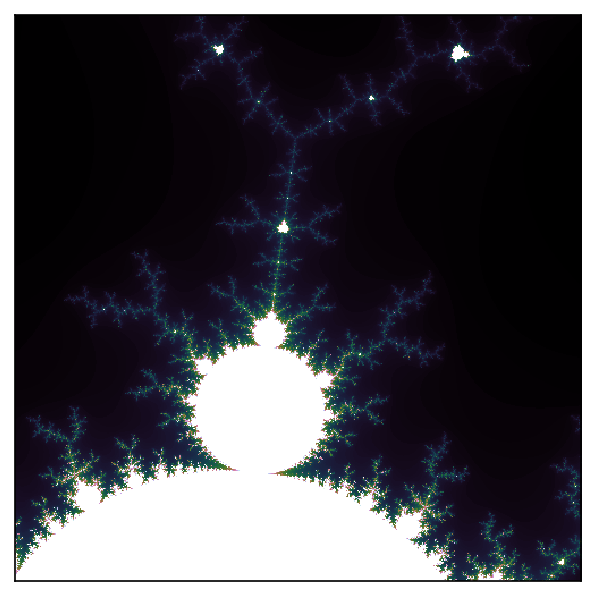

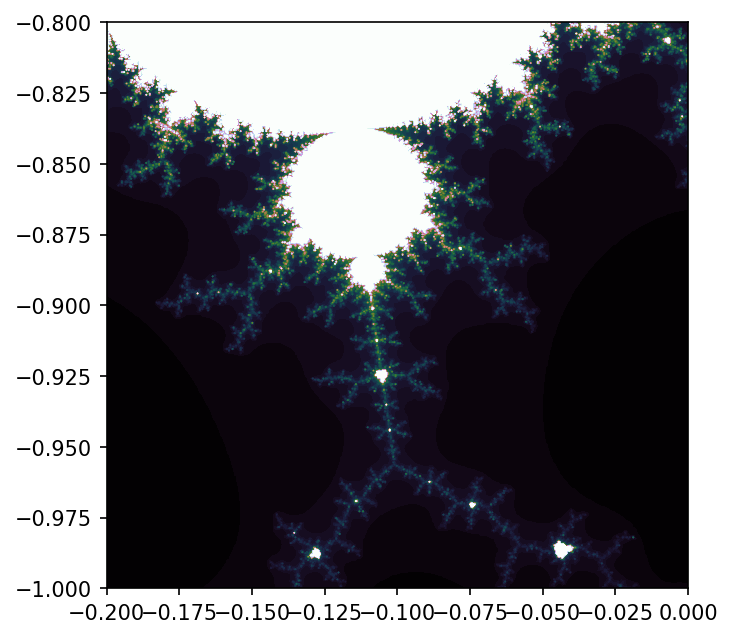

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

fig = plt.figure(figsize = (5, 5), dpi = 150) # 画像の設定
plt.tick_params(length = 0, labelbottom = False, labelleft = False) # 枠を非表示に設定
m = 500 # 画像の細かさ
real = np.linspace(-0.2, -0.0, m) 
imag = np.linspace(-1.0, -0.8, m)
Z = np.zeros([m, m], dtype = 'complex') # 描画元となる値の計算用

for tate, imag_d in enumerate(imag):
    for yoko, real_d in enumerate(real):
        Z[tate, yoko] = real_d + imag_d * 1j # 複素数に変換
c = Z.copy() # 変数 Z に加える値が変わると模様が変化する

imgd = np.zeros([m, m]) # 描画する値を保存する配列
ims = [] # 描画した画像を一枚一枚保存する入れ物
# マンデルブロウ集合を計算し、その計算結果 Z を参考にしながら描画用の配列imgdを作成
for t in np.arange(1, 201): # 200枚分描画するための繰り返し
    for tate in np.arange(m): # 縦軸分繰り返し
        for yoko in np.arange(m):  # 横軸分繰り返し
            if abs(Z[tate, yoko]) <= 2: # 複素数の絶対値が2以内なら
                Z[tate, yoko] = Z[tate, yoko] ** 2 + c[tate, yoko]
                imgd[tate, yoko] = t # 2を超えるタイミングを代入
                # t の値によって色が変化する
    im = plt.imshow(imgd, cmap = 'cubehelix', interpolation = 'nearest', animated = True) # imgd の代わりに abs(Z) も利用可能
    ims.append([im])# アニメーションに画像を追加

ani = ani.ArtistAnimation(fig, ims, interval = 500, blit = True, repeat_delay = 1000)
ani.save('Mandelbrot_set18_4_1.mp4', writer = 'ffmpeg')
fig = plt.figure(figsize = (5, 5), dpi = 150) 
plt.contourf(real, imag, imgd, cmap = 'cubehelix', levels = 50)
plt.savefig('Mandelbrot_set18_4_1.pdf')

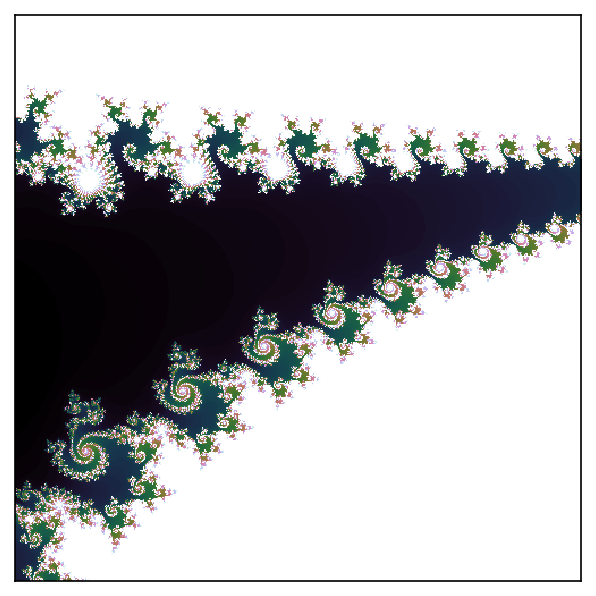

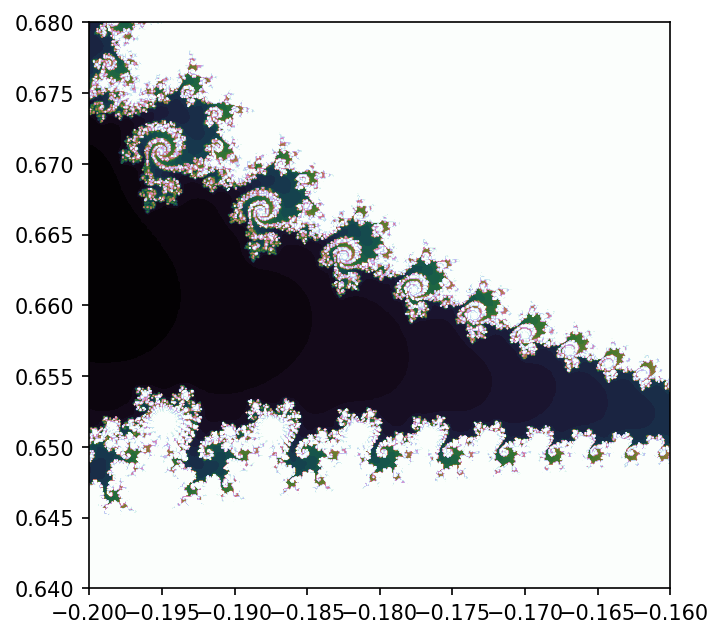

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

fig = plt.figure(figsize = (5, 5), dpi = 150) # 画像の設定
plt.tick_params(length = 0, labelbottom = False, labelleft = False) # 枠を非表示に設定
m = 500 # 画像の細かさ
real = np.linspace(-0.2, -0.16, m) 
imag = np.linspace(0.64, 0.68, m)
Z = np.zeros([m, m], dtype = 'complex') # 描画元となる値の計算用

for tate, imag_d in enumerate(imag):
    for yoko, real_d in enumerate(real):
        Z[tate, yoko] = real_d + imag_d * 1j # 複素数に変換
c = Z.copy() # 変数 Z に加える値が変わると模様が変化する

imgd = np.zeros([m, m]) # 描画する値を保存する配列
ims = [] # 描画した画像を一枚一枚保存する入れ物
# マンデルブロウ集合を計算し、その計算結果 Z を参考にしながら描画用の配列imgdを作成
for t in np.arange(1, 201): # 200枚分描画するための繰り返し
    for tate in np.arange(m): # 縦軸分繰り返し
        for yoko in np.arange(m):  # 横軸分繰り返し
            if abs(Z[tate, yoko]) <= 2: # 複素数の絶対値が2以内なら
                Z[tate, yoko] = Z[tate, yoko] ** 2 + c[tate, yoko]
                imgd[tate, yoko] = t # 2を超えるタイミングを代入
                # t の値によって色が変化する
    im = plt.imshow(imgd, cmap = 'cubehelix', interpolation = 'nearest', animated = True) # imgd の代わりに abs(Z) も利用可能
    ims.append([im])# アニメーションに画像を追加

ani = ani.ArtistAnimation(fig, ims, interval = 500, blit = True, repeat_delay = 1000)
ani.save('Mandelbrot_set18_4_2.mp4', writer = 'ffmpeg')
fig = plt.figure(figsize = (5, 5), dpi = 150) 
plt.contourf(real, imag, imgd, cmap = 'cubehelix', levels = 50)
plt.savefig('Mandelbrot_set18_4_2.pdf')

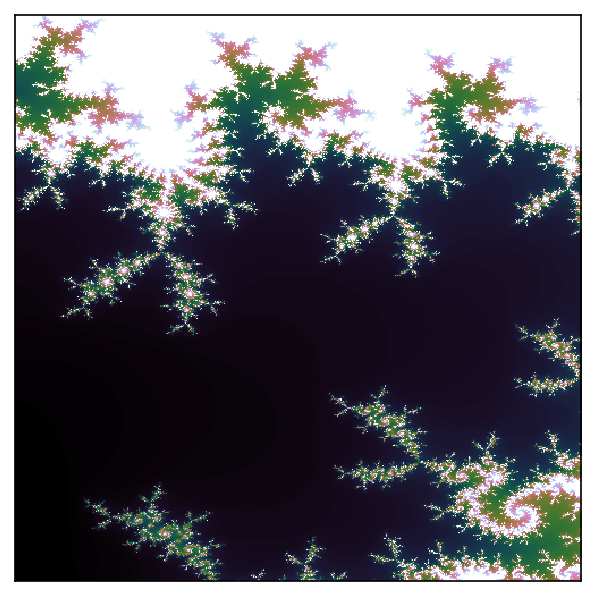

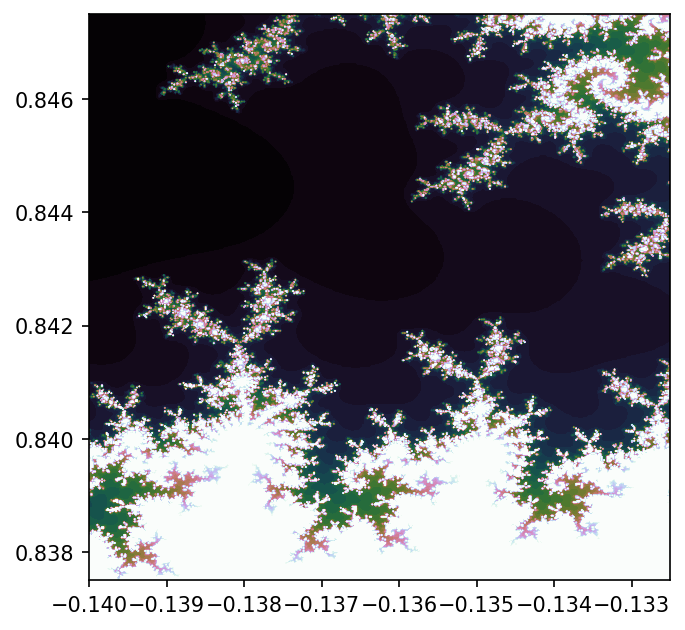

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

fig = plt.figure(figsize = (5, 5), dpi = 150) # 画像の設定
plt.tick_params(length = 0, labelbottom = False, labelleft = False) # 枠を非表示に設定
m = 500 # 画像の細かさ
real = np.linspace(-0.14, -0.1325, m) 
imag = np.linspace(0.8375, 0.8475, m)
Z = np.zeros([m, m], dtype = 'complex') # 描画元となる値の計算用

for tate, imag_d in enumerate(imag):
    for yoko, real_d in enumerate(real):
        Z[tate, yoko] = real_d + imag_d * 1j # 複素数に変換
c = Z.copy() # 変数 Z に加える値が変わると模様が変化する

imgd = np.zeros([m, m]) # 描画する値を保存する配列
ims = [] # 描画した画像を一枚一枚保存する入れ物
# マンデルブロウ集合を計算し、その計算結果 Z を参考にしながら描画用の配列imgdを作成
for t in np.arange(1, 201): # 200枚分描画するための繰り返し
    for tate in np.arange(m): # 縦軸分繰り返し
        for yoko in np.arange(m):  # 横軸分繰り返し
            if abs(Z[tate, yoko]) <= 2: # 複素数の絶対値が2以内なら
                Z[tate, yoko] = Z[tate, yoko] ** 2 + c[tate, yoko]
                imgd[tate, yoko] = t # 2を超えるタイミングを代入
                # t の値によって色が変化する
    im = plt.imshow(imgd, cmap = 'cubehelix', interpolation = 'nearest', animated = True) # imgd の代わりに abs(Z) も利用可能
    ims.append([im])# アニメーションに画像を追加

ani = ani.ArtistAnimation(fig, ims, interval = 500, blit = True, repeat_delay = 1000)
ani.save('Mandelbrot_set18_4_3.mp4', writer = 'ffmpeg')
fig = plt.figure(figsize = (5, 5), dpi = 150) 
plt.contourf(real, imag, imgd, cmap = 'cubehelix', levels = 50)
plt.savefig('Mandelbrot_set18_4_3.pdf')

# 発展課題18.5

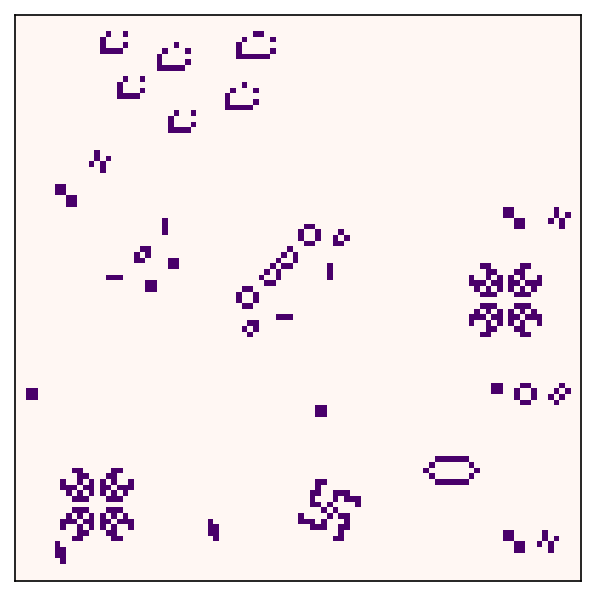

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib.animation as ani
ims = []
fig = plt.figure(figsize = (5, 5), dpi = 150)
plt.tick_params(length = 0, labelbottom = False, labelleft = False)
# 初期状態の読み込み：表計算ソフトで編集したものをそのまま読み込めるように工夫
old_w = pd.read_excel('data//cells//cell-list.xlsx', engine='openpyxl', 
        header = None, index_col = None) # カラム名もインデックス名読み込まないように設定
# 次の状態を保持するnew_wの配列のサイズを設定するために、old_wの配列のサイズを抽出
old_w = old_w.values # 計算の効率化のため2次元配列部分を抽出
n = old_w.shape[0] # 配列の大きさをshapeを用いて取得（正方形の配列を想定）
for t in np.arange(500): # 世代交代の回数
    new_w = np.zeros([n, n]) # 次の状態の入れ物を用意
    for i in np.arange(n): # 2次元配列の行の移動
        for j in np.arange(n): # 2次元配列の列の移動
             # 合計 s に 上下左右、左上、右上、左下、右下の値を加算
            s = old_w[i - 1, j] # 上
            s += old_w[(i + 1) % n, j] # 下
            s += old_w[i, j - 1] # 左
            s += old_w[i, (j + 1) % n] # 右
            s += old_w[i - 1, j - 1] # 左上
            s += old_w[i - 1, (j + 1) % n] # 右上
            s += old_w[(i + 1) % n, j - 1] # 左下
            s += old_w[(i + 1) % n, (j + 1) % n] # 右下  # 合計 s から old_w[i, j] の生物の次世代での生死を判定
            if old_w[i, j] == 0 and 3 == s: # ルール A
                new_w[i, j] = 1
            elif old_w[i, j] == 1 and 2 <= s <= 3: # ルール B
                new_w[i, j] = 1 
            elif old_w[i, j] == 1 and s <= 1 or 4 <= s: # ルール C
                new_w[i, j] = 0 
    # 一世代分の世代交代(全要素にルールを1度適用)が終了したため描画
    im = plt.imshow(new_w,cmap = 'RdPu',interpolation = 'none', animated = True)
    ims.append([im]) # 画像をimsに保存
    old_w = new_w.copy() # 一つ前の状態として遷移した状態を次のステップで利用する準備
ani = ani.ArtistAnimation(fig, ims, interval = 500, blit = True, repeat_delay = 1000)
ani.save('data//cell-list.mp4', writer = 'ffmpeg')

# 発展課題18.6

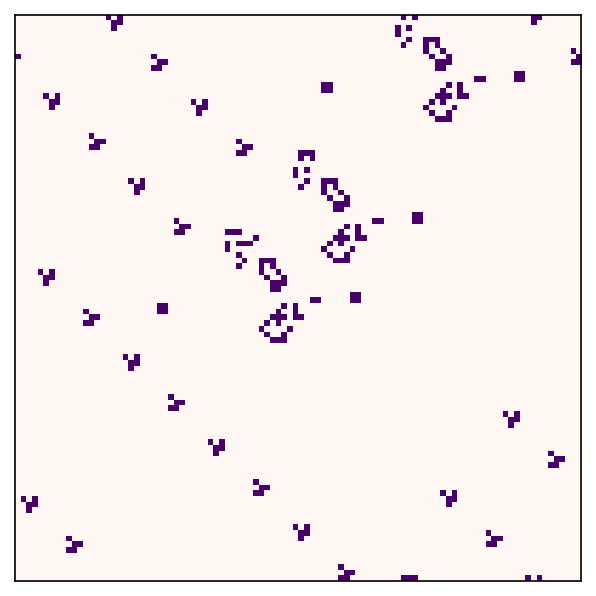

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib.animation as ani
ims = []
fig = plt.figure(figsize = (5, 5), dpi = 150)
plt.tick_params(length = 0, labelbottom = False, labelleft = False)
# 初期状態の読み込み：表計算ソフトで編集したものをそのまま読み込めるように工夫
old_w = pd.read_excel('data//cells//celllist-glider-gun.xlsx',
        header = None, index_col = None) # カラム名もインデックス名読み込まないように設定
# 次の状態を保持するnew_wの配列のサイズを設定するために、old_wの配列のサイズを抽出
old_w = old_w.values # 計算の効率化のため2次元配列部分を抽出
n = old_w.shape[0] # 配列の大きさをshapeを用いて取得（正方形の配列を想定）
for t in np.arange(500): # 世代交代の回数
    new_w = np.zeros([n, n]) # 次の状態の入れ物を用意
    for i in np.arange(n): # 2次元配列の行の移動
        for j in np.arange(n): # 2次元配列の列の移動
             # 合計 s に 上下左右、左上、右上、左下、右下の値を加算
            s = old_w[i - 1, j] # 上
            s += old_w[(i + 1) % n, j] # 下
            s += old_w[i, j - 1] # 左
            s += old_w[i, (j + 1) % n] # 右
            s += old_w[i - 1, j - 1] # 左上
            s += old_w[i - 1, (j + 1) % n] # 右上
            s += old_w[(i + 1) % n, j - 1] # 左下
            s += old_w[(i + 1) % n, (j + 1) % n] # 右下  # 合計 s から old_w[i, j] の生物の次世代での生死を判定
            if old_w[i, j] == 0 and 3 == s: # ルール A
                new_w[i, j] = 1
            elif old_w[i, j] == 1 and 2 <= s <= 3: # ルール B
                new_w[i, j] = 1 
            elif old_w[i, j] == 1 and s <= 1 or 4 <= s: # ルール C
                new_w[i, j] = 0 
    # 一世代分の世代交代(全要素にルールを1度適用)が終了したため描画
    im = plt.imshow(new_w,cmap = 'RdPu',interpolation = 'none', animated = True)
    ims.append([im]) # 画像をimsに保存
    old_w = new_w.copy() # 一つ前の状態として遷移した状態を次のステップで利用する準備
ani = ani.ArtistAnimation(fig, ims, interval = 500, blit = True, repeat_delay = 1000)
ani.save('data//cell-list.mp4', writer = 'ffmpeg')

# 発展課題18.7

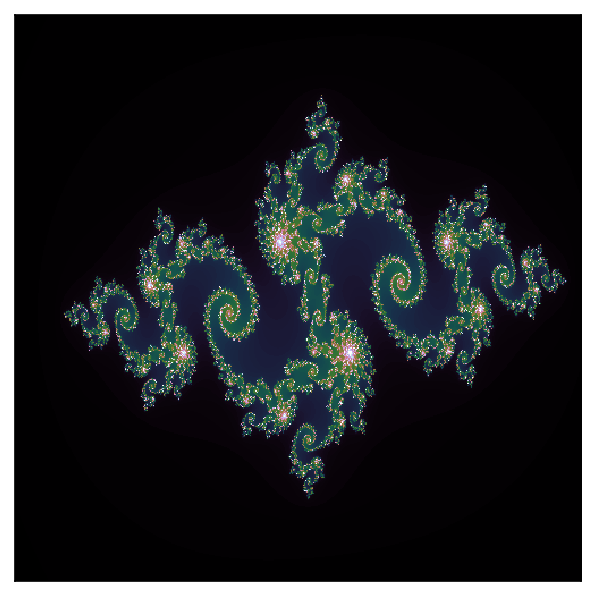

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

fig = plt.figure(figsize = (5, 5), dpi = 150) # 画像の設定
plt.tick_params(length = 0, labelbottom = False, labelleft = False) # 枠を非表示に設定
m = 500 # 画像の細かさ
real = np.linspace(-1.8, 1.6, m) # 横軸に対応
imag = np.linspace(-1.2, 1.2, m) # 縦軸に対応
Z = np.zeros([m, m], dtype = 'complex') # 描画元となる値の計算用

for tate, imag_d in enumerate(imag):
    for yoko, real_d in enumerate(real):
        Z[tate, yoko] = real_d + imag_d * 1j # 複素数に変換
c = -0.778+ 0.136j

imgd = np.zeros([m, m]) # 描画する値を保存する配列
ims = [] # 描画した画像を一枚一枚保存する入れ物
# マンデルブロウ集合を計算し、その計算結果 Z を参考にしながら描画用の配列imgdを作成
for t in np.arange(1, 201): # 200枚分描画するための繰り返し
    for tate in np.arange(m): # 縦軸分繰り返し
        for yoko in np.arange(m):  # 横軸分繰り返し
            if abs(Z[tate, yoko]) <= 2: # 複素数の絶対値が2以内なら
                Z[tate, yoko] = Z[tate, yoko] ** 2 + c
                imgd[tate, yoko] = t # 2を超えるタイミングを代入
                # t の値によって色が変化する
    im = plt.imshow(imgd, cmap = 'cubehelix', interpolation = 'nearest', animated = True) # imgd の代わりに abs(Z) も利用可能
    ims.append([im])# アニメーションに画像を追加

ani = ani.ArtistAnimation(fig, ims, interval = 500, blit = True, repeat_delay = 1000)
ani.save('Mandelbrot_set.mp4', writer = 'ffmpeg')

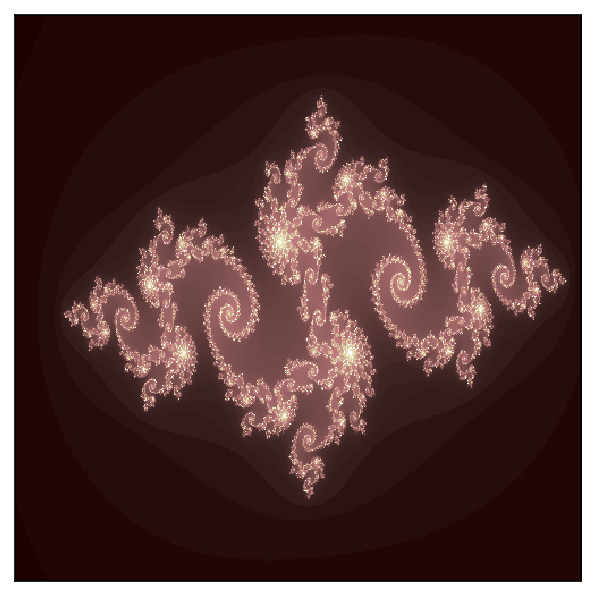

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

fig = plt.figure(figsize = (5, 5), dpi = 150) # 画像の設定
plt.tick_params(length = 0, labelbottom = False, labelleft = False) # 枠を非表示に設定
m = 500 # 画像の細かさ
real = np.linspace(-1.8, 1.6, m) # 横軸に対応
imag = np.linspace(-1.2, 1.2, m) # 縦軸に対応
Z = np.zeros([m, m], dtype = 'complex') # 描画元となる値の計算用

for tate, imag_d in enumerate(imag):
    for yoko, real_d in enumerate(real):
        Z[tate, yoko] = real_d + imag_d * 1j # 複素数に変換
c = -0.778+ 0.136j

imgd = np.zeros([m, m]) # 描画する値を保存する配列
ims = [] # 描画した画像を一枚一枚保存する入れ物
# マンデルブロウ集合を計算し、その計算結果 Z を参考にしながら描画用の配列imgdを作成
for t in np.arange(1, 201): # 200枚分描画するための繰り返し
    for tate in np.arange(m): # 縦軸分繰り返し
        for yoko in np.arange(m):  # 横軸分繰り返し
            if abs(Z[tate, yoko]) <= 2: # 複素数の絶対値が2以内なら
                Z[tate, yoko] = Z[tate, yoko] ** 2 + c
                imgd[tate, yoko] = t # 2を超えるタイミングを代入
                # t の値によって色が変化する
    im = plt.imshow(imgd, cmap = 'pink', interpolation = 'nearest', animated = True) # imgd の代わりに abs(Z) も利用可能
    ims.append([im])# アニメーションに画像を追加

ani = ani.ArtistAnimation(fig, ims, interval = 500, blit = True, repeat_delay = 1000)
ani.save('Mandelbrot_set.mp4', writer = 'ffmpeg')